In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os, sys
import time

In [14]:
sys.path.append("../")
from randman import NumpyRandman, TorchRandman

In [18]:
res = []
for nb_samp in [1e2, 1e3, 1e4, 1e5, 1e6]:
    nb_samp = int(nb_samp)
    print(nb_samp)
    
    rm = NumpyRandman(1000,10)
    t0 = time.time()
    x,y = rm.get_random_manifold_samples(nb_samp)
    r_numpy = time.time()-t0
    print("NumPy: %fs"%(r_numpy))
    
    
    rm = TorchRandman(1000,10)
    t0 = time.time()
    x,y = rm.get_random_manifold_samples(nb_samp)
    r_torch = time.time()-t0
    print("Torch: %fs"%(r_torch))

    device=torch.device("cuda")
    rm = TorchRandman(1000,10,device=device)
    t0 = time.time()
    x,y = rm.get_random_manifold_samples(nb_samp)
    r_gpu = time.time()-t0
    print("GPU: %fs"%(r_gpu))
    
    res.append((nb_samp, r_numpy, r_torch, r_gpu))

100
NumPy: 3.384925s
Torch: 6.506753s
GPU: 28.225970s
1000
NumPy: 10.732787s
Torch: 11.239008s
GPU: 28.609972s
10000
NumPy: 79.722849s
Torch: 57.675379s
GPU: 28.725941s
100000
NumPy: 778.000678s
Torch: 187.108907s
GPU: 29.559113s
1000000
NumPy: 9477.241735s
Torch: 1549.031467s
GPU: 78.359199s


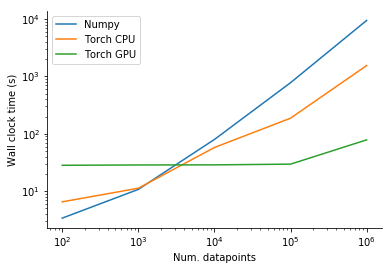

In [19]:
dat=np.array(res)
plt.plot(dat[:,0],dat[:,1:])
plt.legend(labels=["Numpy", "Torch CPU", "Torch GPU"])
plt.xlabel("Num. datapoints")
plt.ylabel("Wall clock time (s)")
plt.loglog()
sns.despine()